In [1]:
import pandas as pd

df = pd.read_parquet('../data/parquet/dataset_site_info.parquet')

datatiers = ['AODSIM', 'MINIAODSIM', 'NANOAODSIM']
df = df[(df['tier'].isin(datatiers))]

df = df.drop(columns=['dataset_id', 'replica_time_create', 'br_user_group_id'])
df = df.dropna()

for word in ['BUNNIES', 'Commissioning', 'RelVal']:
    df = df[~df['dataset_name'].str.contains(word)]


In [2]:
import json

with open('../data/datasets_mcm_info.json') as file:
    mcm_info = json.load(file)

df['pwg'] = df['dataset_name'].apply(
    lambda d: mcm_info[d]['pwg'] if d in mcm_info else 'None')

df.head(None)


,dataset_name,node_name,rep_size,min_time,max_time,tier,pwg
1,/QCD_Pt_120to170_TuneCP5_13TeV_pythia8/RunIISu...,T2_IN_TIFR,5.754734e+11,2020-07-02,2020-12-31,MINIAODSIM,MUO
3,/QCD_HT1500to2000_TuneCP5_PSWeights_13TeV-madg...,T1_US_FNAL_Disk,1.753403e+11,2020-01-18,2020-12-31,MINIAODSIM,HIG
5,/GMSB_L-100TeV_Ctau-10cm_TuneCP5_13TeV-pythia8...,T2_UA_KIPT,6.753019e+09,2020-04-07,2020-12-31,MINIAODSIM,EXO
6,/MajoranaNeutrinoToMuMuMu_M-10_TuneCUETP8M1_13...,T1_UK_RAL_Disk,3.050911e+09,2020-02-04,2020-12-31,MINIAODSIM,EXO
7,/BlackHole_BH10_MD3000_MBH8000_n6_13TeV_TuneCU...,T2_US_Wisconsin,6.016885e+08,2020-02-10,2020-12-31,MINIAODSIM,EXO
...,...,...,...,...,...,...,...
6752623,/ZGGToLLGG_5f_TuneCP5_13TeV-amcatnlo-pythia8/R...,T2_CH_CERN,3.524661e+07,2019-03-18,2019-03-18,NANOAODSIM,SMP
6752624,/ZJetsToNuNu_HT-800To1200_13TeV-madgraph/RunII...,T2_US_Wisconsin,6.929573e+09,2020-03-24,2020-03-24,MINIAODSIM,HIG
6752625,/WZTo3LNu_mllmin01_NNPDF31_TuneCP5_13TeV_powhe...,T2_UK_SGrid_RALPP,3.800483e+09,2019-01-16,2019-01-16,AODSIM,None
6752628,/SMS-T5qqqqHg_refPoints_TuneCP2_13TeV-madgraph...,T1_IT_CNAF_Disk,7.544165e+08,2020-06-11,2020-06-11,MINIAODSIM,SUS


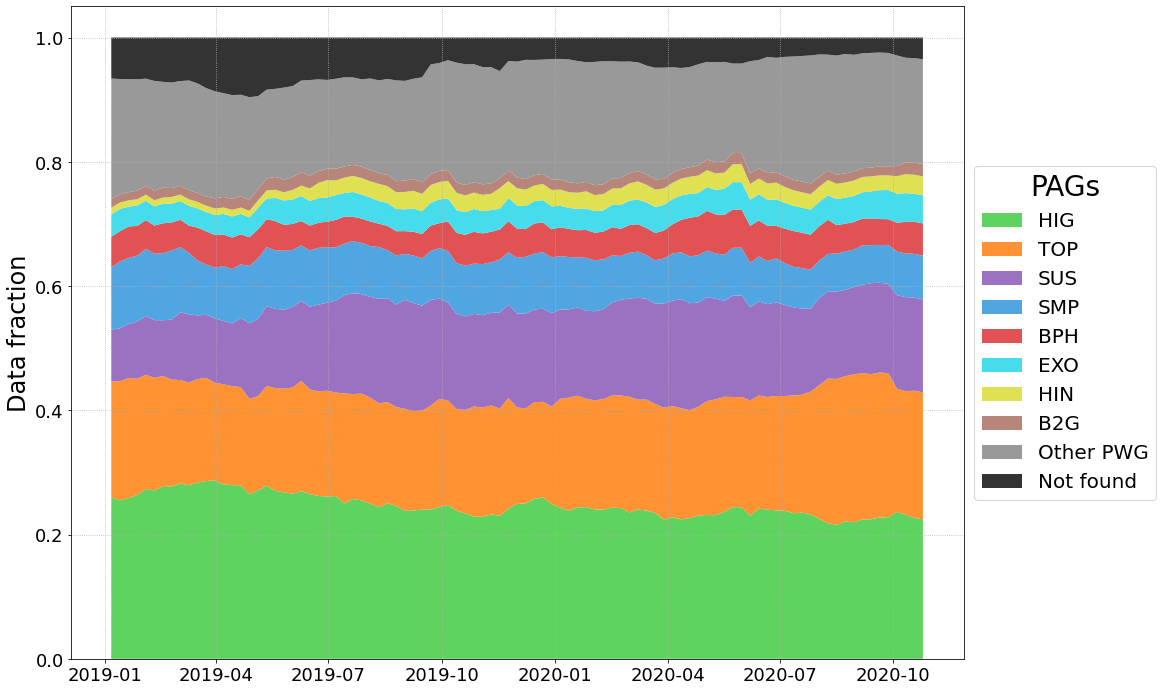

In [3]:
import pylab as plt
from cmSim.container import DataContainer

data = DataContainer.from_dataframe(df)

fig, ax = plt.subplots(figsize=(16, 12))
data.plot_storage_history_by_pag(
    ax, date1='2019-01-01', date2='2020-10-31', freq='W', norm=True)
fig.set_facecolor('white')

plt.show()
